# Example 10.5: Rankine with Reheat and OFH Regeneration

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A superheat steam power plant with reheat has a turbine inlet at $3\ \mathrm{MPa}$ and $550^\circ\mathrm{C}$.  After expansion to $400\ \mathrm{kPa}$, a fraction of the steam is extracted and used in a regeneration process with an Open Feedwater Heater (OFH) where the exit of the OFH is saturated liquid at $400\ \mathrm{kPa}$.  The remaining steam is reheated to $550^\circ\mathrm{C}$ and then expanded to $15\ \mathrm{kPa}$.  For isentropic efficiencies of $\eta_t=0.8$ and $\eta_p=0.6$ find:
* (a) Specific net work (kJ/kg)
* (c) Thermal efficiency of the cycle
* (d) Sketch a $T$-$s$ diagram of the cycle

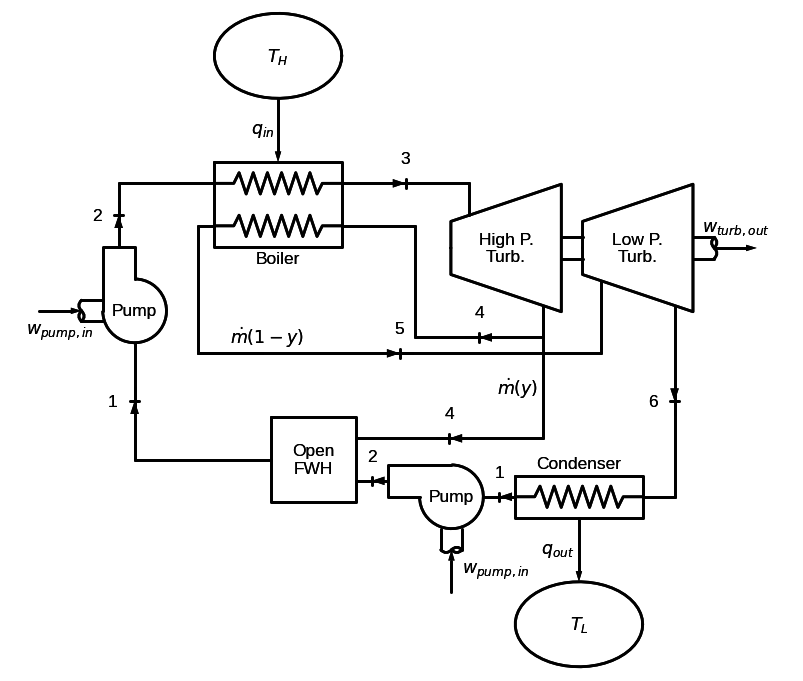

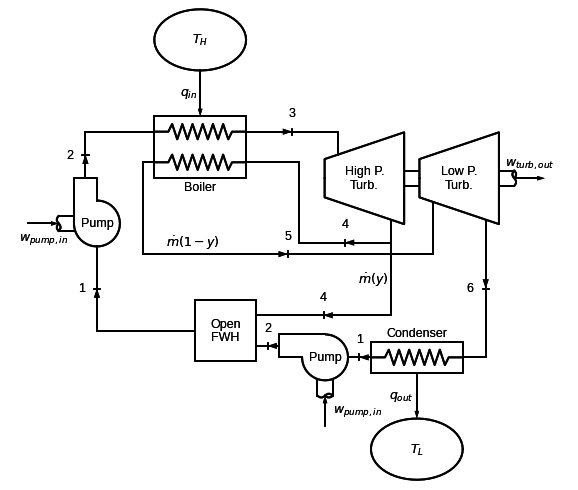

In [4]:
# import schematics # <- uncomment to regeneration schematic
# schematics.rankine_reheat_ofh_regen(file='Figures/Rankine_with_reheat_OFH_regen.png'); # <- uncomment to regenerate schematic
from IPython.display import Image
Image('Figures/Rankine_with_reheat_OFH_regen.png')

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=2140132&node=7988530&a=781891447&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [5]:
from kilojoule.templates.kSI_C import *

water = realfluid.Properties('Water')

### Given Parameters
We now define variables to hold our known values.

In [6]:
T[5] = Quantity(550.0,'degC') # Turbine inlet temperature
p[5] = Quantity(3.0,'MPa')    # Turbine inlet pressure
p[6] = Quantity(400.0,'kPa')  # Pressure after first expansion
T[7] = Quantity(550.0,'degC') # Reheat temperature
p[8] = Quantity(15.0,'kPa')   # Pressure after second expansion
eta_t = Quantity(0.8,'')      # Turbine isentropic efficiency
eta_p = Quantity(0.6,'')      # Pump isentropic efficiency

Summary();

### Assumptions
- Non-ideal work devices
- Superheat in boiler: superheated vapor at boiler exit
- Single phase into pump: saturated liquid at condenser exit
- Isobaric heat exchagners
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [7]:
x[1] = 0            # Single phase into pump
x[3] = 0            # Single phase into pump
p[1] = p[8]         # isobaric heat exchanger
p[2] = p[3] = p[6]  # isobaric heat exchanger
p[7] = p[6]         # isobaric heat exchanger
p[4] = p[5]         # isobaric heat exchanger

Summary();

#### (a) Specific net work

In [8]:
%%showcalc
"### State 1)"
states.fix(1,water) # hide

"### 1-2) Non-ideal compression"
"Isentropic compression"
p['2s'] = p[2]
s['2s'] = s[1]
states.fix('2s',water) # hide

"Actual compression"
h[2] = h[1] + (h['2s']-h[1])/eta_p
states.fix(2,water) # hide

"### State 3)"
states.fix(3,water) # hide

"### 3-4) Non-ideal compression"
"Isentropic compression"
p['4s'] = p[4]
s['4s'] = s[3]
states.fix('4s',water) # hide

"Actual compression"
h[4] = h[3] + (h['4s']-h[3])/eta_p
states.fix(4,water) # hide

"### 4-5) Isobaric heat addition"
states.fix(5,water) # hide

"### 5-6) Non-ideal expansion"
"Isentropic Expansion"
p['6s'] = p[6]
s['6s'] = s[5]
states.fix('6s',water) # hide

"Actual expansion"
h[6] = h[5] - eta_t*(h[5]-h['6s'])
states.fix(6,water) # hide

"### 6-7) Isobaric heat addition"
states.fix(7,water) # hide

"### 7-8) Non-ideal expansion"
"Isentropic Expansion"
p['8s'] = p[8]
s['8s'] = s[7]
states.fix('8s',water) # hide

"Actual expansion"
h[8] = h[7] - eta_t*(h[7]-h['8s'])
states.fix(8,water) # hide

"### Mass bleed-off fraction"
y = (h[3]-h[2])/(h[6]-h[2])

"### Work"
w_1_to_2 = (1-y)*(h[1]-h[2])
w_3_to_4 = h[3]-h[4]
w_5_to_6 = h[5]-h[6]
w_7_to_8 = (1-y)*(h[7]-h[8])
w_net = w_1_to_2 + w_3_to_4 + w_5_to_6 + w_7_to_8

### State 1)
Fixing state 1 using previously defined values.
### 1-2) Non-ideal compression
Isentropic compression
\begin{align}
  {p}_{ \mathrm{2s} } &=  {p}_{ 2 }  = 400.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{2s} } &=  {s}_{ 1 }  = 0.75486\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

Fixing state 2s using previously defined values.
Actual compression
\begin{align}
  {h}_{ 2 } &=  {h}_{ 1 } + \frac{  {h}_{ \mathrm{2s} } - {h}_{ 1 }  }{ \eta_{p} } \\
    &= 225.94\ \frac{\mathrm{kJ}}{\mathrm{kg}} + \frac{  226.33\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 225.94\ \frac{\mathrm{kJ}}{\mathrm{kg}}  }{ 0.6 }\\
    &= 226.59\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

Fixing state 2 using previously defined values.
### State 3)
Fixing state 3 using previously defined values.
### 3-4) Non-ideal compression
Isentropic compression
\begin{align}
  {p}_{ \mathrm{4s} } &=  {p}_{ 4 }  = 3000.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{4s} } &=  {s}_{ 3 }  = 1.7765\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

Fixing state 4s using previously defined values.
Actual compression
\begin{align}
  {h}_{ 4 } &=  {h}_{ 3 } + \frac{  {h}_{ \mathrm{4s} } - {h}_{ 3 }  }{ \eta_{p} } \\
    &= 604.65\ \frac{\mathrm{kJ}}{\mathrm{kg}} + \frac{  607.47\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 604.65\ \frac{\mathrm{kJ}}{\mathrm{kg}}  }{ 0.6 }\\
    &= 609.35\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

Fixing state 4 using previously defined values.
### 4-5) Isobaric heat addition
Fixing state 5 using previously defined values.
### 5-6) Non-ideal expansion
Isentropic Expansion
\begin{align}
  {p}_{ \mathrm{6s} } &=  {p}_{ 6 }  = 400.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{6s} } &=  {s}_{ 5 }  = 7.3768\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

Fixing state 6s using previously defined values.
Actual expansion
\begin{align}
  {h}_{ 6 } &=   {h}_{ 5 } -  \eta_{t}  \cdot  \left(  {h}_{ 5 } - {h}_{ \mathrm{6s} }  \right)   \\
    &=  3569.7\ \frac{\mathrm{kJ}}{\mathrm{kg}} -  0.8  \cdot  \left(  3569.7\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 2962.6\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right)  \\
    &= 3084.0\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

Fixing state 6 using previously defined values.
### 6-7) Isobaric heat addition
Fixing state 7 using previously defined values.
### 7-8) Non-ideal expansion
Isentropic Expansion
\begin{align}
  {p}_{ \mathrm{8s} } &=  {p}_{ 8 }  = 15.0\ \mathrm{kPa} 
\end{align}

\begin{align}
  {s}_{ \mathrm{8s} } &=  {s}_{ 7 }  = 8.3287\ \frac{\mathrm{kJ}}{\left(\mathrm{K} \cdot \mathrm{kg}\right)} 
\end{align}

Fixing state 8s using previously defined values.
Actual expansion
\begin{align}
  {h}_{ 8 } &=   {h}_{ 7 } -  \eta_{t}  \cdot  \left(  {h}_{ 7 } - {h}_{ \mathrm{8s} }  \right)   \\
    &=  3593.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} -  0.8  \cdot  \left(  3593.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 2712.8\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right)  \\
    &= 2888.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

Fixing state 8 using previously defined values.
### Mass bleed-off fraction
\begin{align}
  y &=  \frac{  {h}_{ 3 } - {h}_{ 2 }  }{  {h}_{ 6 } - {h}_{ 2 }  } \\
    &= \frac{  604.65\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 226.59\ \frac{\mathrm{kJ}}{\mathrm{kg}}  }{  3084.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 226.59\ \frac{\mathrm{kJ}}{\mathrm{kg}}  }\\
    &= 0.13231
\end{align}

### Work
\begin{align}
  w_{1\to{}2} &=   \left(  1 - y  \right)  \cdot  \left(  {h}_{ 1 } - {h}_{ 2 }  \right)  \\
    &=  \left(  1 - 0.13231  \right)  \cdot  \left(  225.94\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 226.59\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right) \\
    &= -0.56454\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  w_{3\to{}4} &=   {h}_{ 3 } - {h}_{ 4 }  \\
    &=  604.65\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 609.35\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= -4.6924\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  w_{5\to{}6} &=   {h}_{ 5 } - {h}_{ 6 }  \\
    &=  3569.7\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 3084.0\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 485.66\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  w_{7\to{}8} &=   \left(  1 - y  \right)  \cdot  \left(  {h}_{ 7 } - {h}_{ 8 }  \right)  \\
    &=  \left(  1 - 0.13231  \right)  \cdot  \left(  3593.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 2888.9\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right) \\
    &= 611.42\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

\begin{align}
  w_{net} &=  w_{1\to{}2} + w_{3\to{}4} + w_{5\to{}6} + w_{7\to{}8} \\
    &= -0.56454\ \frac{\mathrm{kJ}}{\mathrm{kg}} + -4.6924\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 485.66\ \frac{\mathrm{kJ}}{\mathrm{kg}} + 611.42\ \frac{\mathrm{kJ}}{\mathrm{kg}}\\
    &= 1091.8\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}



#### (b) Thermal efficiency

In [9]:
%%showcalc
"### Boiler First Law"
q_in = h[5]-h[4] + (1-y)*(h[7]-h[6])

"### Thermal efficiency"
eta_th = (w_net/q_in).to('')

### Boiler First Law
\begin{align}
  q_{in} &=   {h}_{ 5 } - {h}_{ 4 }  +  \left(  1 - y  \right)  \cdot  \left(  {h}_{ 7 } - {h}_{ 6 }  \right)  \\
    &=  3569.7\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 609.35\ \frac{\mathrm{kJ}}{\mathrm{kg}}  +  \left(  1 - 0.13231  \right)  \cdot  \left(  3593.6\ \frac{\mathrm{kJ}}{\mathrm{kg}} - 3084.0\ \frac{\mathrm{kJ}}{\mathrm{kg}}  \right) \\
    &= 3402.5\ \frac{\mathrm{kJ}}{\mathrm{kg}}
\end{align}

### Thermal efficiency
\begin{align}
  \eta_{th} &=  \frac{ w_{net} }{ q_{in} } \\
    &= \frac{ 1091.8\ \frac{\mathrm{kJ}}{\mathrm{kg}} }{ 3402.5\ \frac{\mathrm{kJ}}{\mathrm{kg}} }\\
    &= 0.32089
\end{align}



#### (d) Diagrams

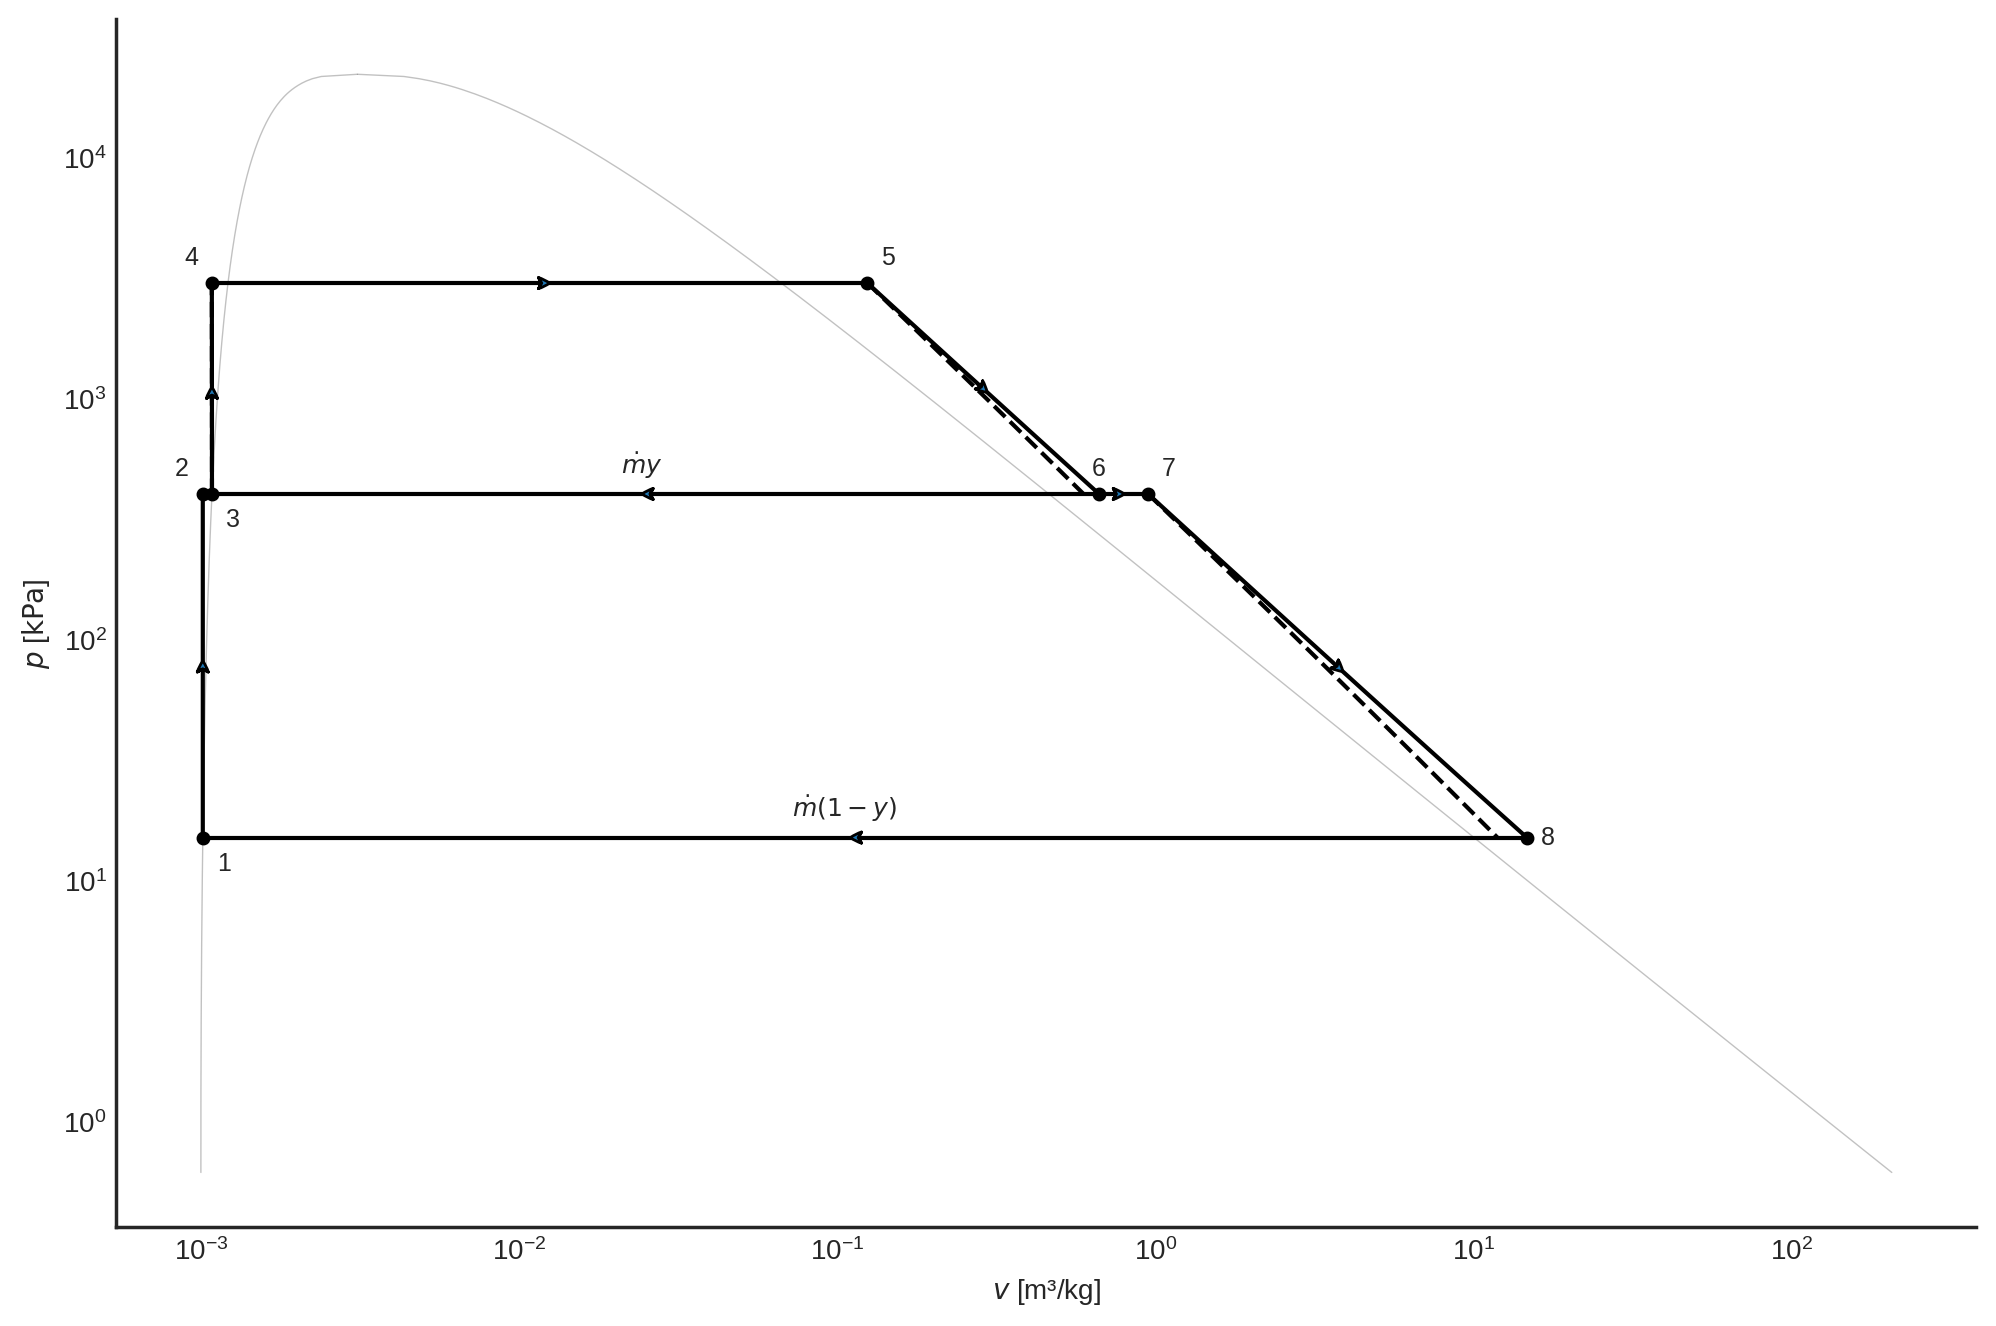

In [13]:
pv = water.pv_diagram(log_x=True,log_y=True)

pv.plot_state(states[1],label_loc='south east')
pv.plot_state(states[2],label_loc='north west')
pv.plot_state(states[3],label_loc='south east')
pv.plot_state(states[4],label_loc='north west')
pv.plot_state(states[5],label_loc='north east')
pv.plot_state(states[6],label_loc='north')
pv.plot_state(states[7],label_loc='north east')
pv.plot_state(states[8],label_loc='east')
    
pv.plot_process(states[1],states[2],path='nonideal')
pv.plot_process(states[2],states[3],path='isobaric',arrow=False)
pv.plot_process(states[3],states[4],path='nonideal')
pv.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed', arrow=False)
pv.plot_process(states[4],states[5],path='isobaric')
pv.plot_process(states[5],states[6],path='nonideal')
pv.plot_process(states[5],states['6s'],path='isentropic',linestyle='dashed', arrow=False)
pv.plot_process(states[6],states[7],path='isobaric')
pv.plot_process(states[7],states[8],path='nonideal')
pv.plot_process(states[7],states['8s'],path='isentropic',linestyle='dashed', arrow=False)
pv.plot_process(states[6],states[3],path='isobaric',label='$\dot{m}y$')
pv.plot_process(states[8],states[1],path='isobaric',label='$\dot{m}(1-y)$');

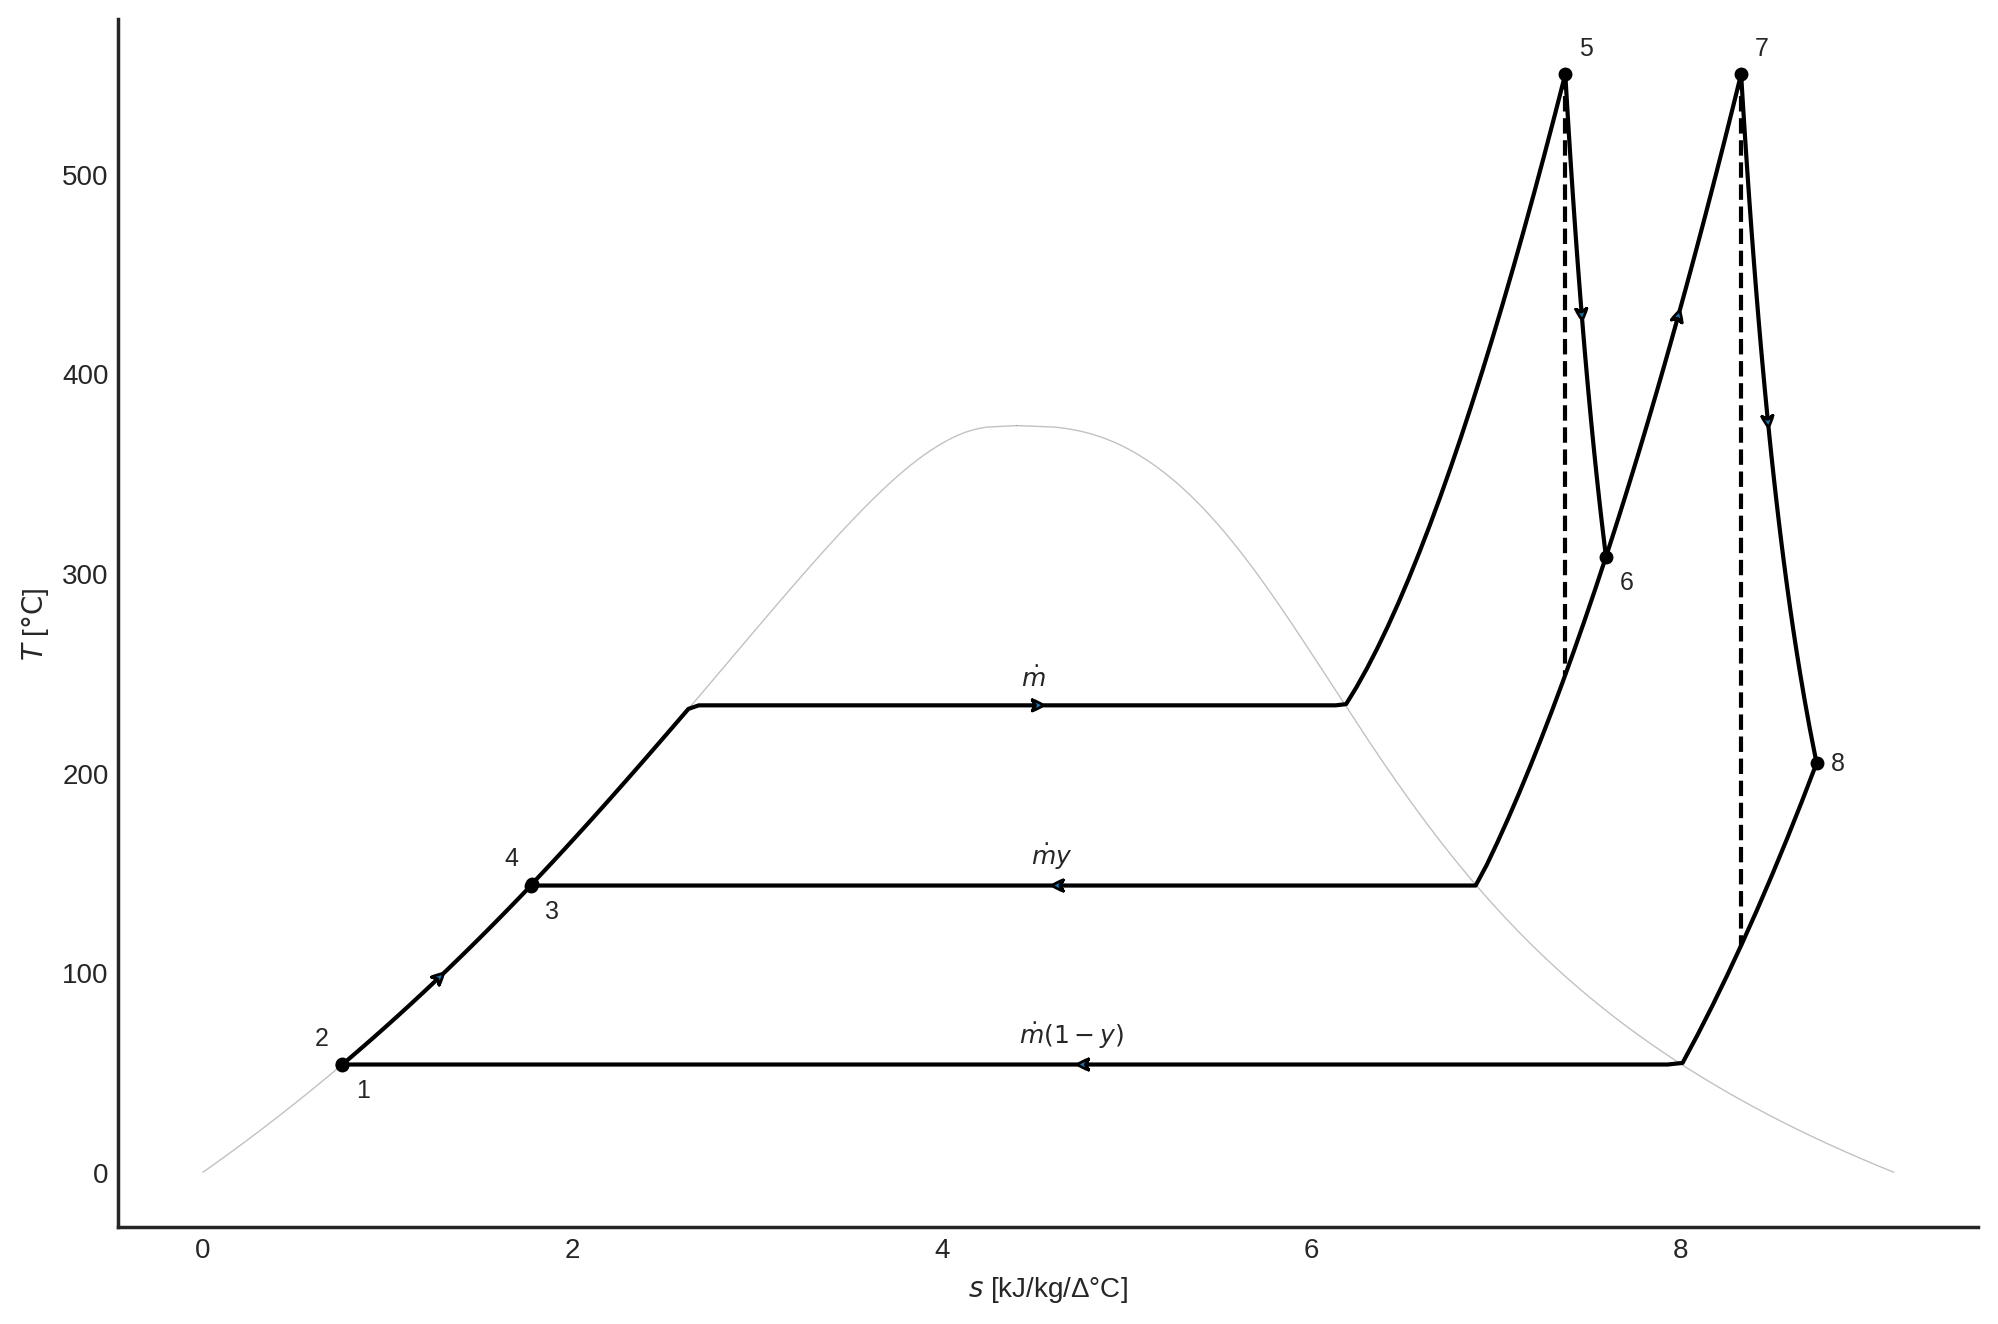

In [12]:
Ts = water.Ts_diagram()

Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='north west')
Ts.plot_state(states[3],label_loc='south east')
Ts.plot_state(states[4],label_loc='north west')
Ts.plot_state(states[5],label_loc='north east')
Ts.plot_state(states[6],label_loc='south east')
Ts.plot_state(states[7],label_loc='north east')
Ts.plot_state(states[8],label_loc='east')
    
Ts.plot_process(states[1],states[2],path='nonideal',arrow=False)
Ts.plot_process(states[2],states[3],path='isobaric')
Ts.plot_process(states[3],states[4],path='nonideal',arrow=False)
Ts.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[4],states[5],path='isobaric',label='$\dot{m}$',xcoor=4.5)
Ts.plot_process(states[5],states[6],path='nonideal')
Ts.plot_process(states[5],states['6s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[6],states[7],path='isobaric')
Ts.plot_process(states[7],states[8],path='nonideal')
Ts.plot_process(states[7],states['8s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[6],states[3],path='isobaric',label='$\dot{m}y$')
Ts.plot_process(states[8],states[1],path='isobaric',label='$\dot{m}(1-y)$');

In [15]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html_embed --no-prompt --no-input "Ex10.5 Rankine with Reheat and OFH Regeneration.ipynb"